## Dataset Embedding Experiments with fine tuned SBERT and cross encoder

In [25]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [26]:
import pandas as pd
import json

In [27]:
from sentence_transformers import SentenceTransformer, CrossEncoder

finetuned_model_path = "../3_fine_tuning/models/job-matcher-content_20251123_110713"
bi_encoder = SentenceTransformer(finetuned_model_path)

with open(f"{finetuned_model_path}/model_metadata.json", "r") as f:
    metadata = json.load(f)
    optimal_threshold = metadata["performance"]["optimal_threshold"]

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-12-v2')



In [28]:
jd_df = pd.read_excel("../1_data_cleaning/filtered_jd_sections2.xlsx")


In [29]:
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Development Associate,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED


In [30]:
# create semantic sentence for each row
def jd_build_semantic_sentence(row):
    desc = str(row.get("job_description", ""))
    duties = str(row.get("jd_duties", ""))
    req = str(row.get("jd_requirements", ""))
    edu = str(row.get("jd_education", ""))
    title = str(row.get("job_title", ""))

    return (
        f"Job Posting:\n"
        f"- Job Title: {title}\n"
        f"- Description: {desc}\n"
        f"- Responsibilities: {duties}\n"
        f"- Requirements: {req}\n"
        f"- Preferred Education: {edu}"
    )



jd_df["semantic_sentence"] = jd_df.apply(jd_build_semantic_sentence, axis=1)
jd_df.head()



,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Development Associate,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Development Associa...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...


In [31]:
resume_df = pd.read_csv("../1_data_cleaning/resume_cleaned_100.csv")

In [32]:
resume_df.head(10)

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...
5,"Fresher starting out with Business Analysis, a...","['Business Analyst', 'Data Analysis', 'Busines...",['BBA'],['N/A'],['Part-Time Analyst'],"Full Stack Development\nFront-end: ReactJS, Ne..."
6,Data Scientist working on problems related to ...,"['Java', 'C++', 'Python', 'Machine Learning', ...","['B.Tech', 'M.Tech']","['Computer Science', 'Computer Science Enginee...",['Data Scientist'],Machine Learning Design\nData Analysis\nModel ...
7,Financial Accountant specializing in financial...,"['account reconciliations', 'accounting', 'acc...","['MBA', 'B.Com', 'Diploma']","['Finance and IT', 'Mgt Hons', 'Computer Appli...","['Accountant', 'Consultant', 'N/A']",Machinery Maintenance\nTroubleshooting\nReport...
8,I am fresher data analyst starting out in ERP ...,"['MIS reporting', 'Advanced Excel', 'Dashboard...","['B.A (Economics)', 'M.A (Economics), Correspo...","['Economics', 'Economics']",['MIS Analyst'],Management Trainee\nMechanical Systems\nMainte...
9,Certified Data analyst with a degree in Electr...,"['Python', 'Machine Learning', 'MySQL', 'Data ...",['B.Tech/B.E.'],['Electronics/Telecommunication'],['Associate Analyst'],Project Design\nData Analysis\nACCORD/Alliance...


In [33]:
# create semantic sentences for resumes
def resume_build_semantic_sentence(row):
    def clean(value):
        if value is None:
            return ""
        if isinstance(value, list):
            return ", ".join([str(v) for v in value])
        return str(value).strip()

    career = clean(row.get("career_objective", ""))
    skills = clean(row.get("skills", ""))
    degrees = clean(row.get("degree_names", ""))
    majors = clean(row.get("major_field_of_studies", ""))
    work_exp = clean(row.get("responsibilities", ""))

    return (
        "Candidate Profile:\n"
        f"- Career Objective: {career}\n"
        f"- Work Experience: {work_exp}\n"
        f"- Skills: {skills}\n"
        f"- Degrees: {degrees}\n"
        f"- Major Field(s) of Study: {majors}"
    )


In [34]:
# create semantic sentences for resumes
resume_df["semantic_sentence"] = resume_df.apply(resume_build_semantic_sentence, axis=1)
resume_df.head()


,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...


In [35]:
# add index columns for both datasets
jd_df["jd_index"] = jd_df.index
resume_df["resume_index"] = resume_df.index


In [36]:
def embed_sentence(sentence):
    return bi_encoder.encode(sentence)


In [37]:
# embed JD semantic sentences
jd_df["semantic_emb"] = jd_df["semantic_sentence"].apply(embed_sentence)
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence,jd_index,semantic_emb
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...,0,"[-0.056657605, -0.013936594, -0.009734832, -0...."
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...,1,"[-0.008509652, -0.03212229, 0.058192987, -0.06..."
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Development Associate,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Development Associa...,2,"[-0.0007237612, -0.048282783, 0.0021079886, -0..."
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...,3,"[-0.06765924, -0.05002551, 0.12113112, -0.0760..."
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...,4,"[-0.071505204, -0.048909172, 0.09532954, -0.01..."


In [38]:
# embed resume semantic sentences
resume_df["semantic_emb"] = resume_df["semantic_sentence"].apply(embed_sentence)
resume_df.head()

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence,resume_index,semantic_emb
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...,0,"[-0.054718412, -0.086723775, 0.04876865, -0.02..."
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...,1,"[-0.036918167, -0.05895134, 0.02675679, -0.024..."
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...,2,"[-0.022515552, -0.06440777, 0.015861444, 0.009..."
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...,3,"[-0.06850342, -0.06835689, 0.037963856, 0.0138..."
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...,4,"[-0.044515163, -0.01788426, 0.0022169491, -0.0..."


In [39]:
# convert to numpy array
import numpy as np

resume_df["semantic_emb"] = resume_df["semantic_emb"].apply(lambda x: np.array(x))
jd_df["semantic_emb"] = jd_df["semantic_emb"].apply(lambda x: np.array(x))


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_coarse_candidates(resume_embedding, jd_df, top_k=50):
    # ensure JD embeddings form a clean 2D matrix
    jd_embs = np.vstack(jd_df["semantic_emb"].values)   # shape: (N, dim)

    # get cosine similarity scores
    sims = cosine_similarity(resume_embedding.reshape(1, -1), jd_embs)[0]

    # attach scores
    candidates = jd_df.copy()
    candidates["sim"] = sims

    # return top-k by cosine similarity
    return candidates.sort_values("sim", ascending=False).head(top_k)


In [41]:
def rerank_with_cross_encoder(resume_sentence, candidate_df, cross_encoder, top_k=3):
    if candidate_df is None or len(candidate_df) == 0:
        return []

    pairs = [(resume_sentence, jd_sent) for jd_sent in candidate_df["semantic_sentence"]]
    scores = cross_encoder.predict(pairs)

    candidate_df = candidate_df.copy()
    candidate_df["ce_score"] = scores  # keep raw CE score

    top_matches = candidate_df.sort_values("ce_score", ascending=False).head(top_k)
    return top_matches


In [42]:
def match_resume(resume_row, jd_df, k_coarse=50, k_final=3):
    resume_emb = np.array(resume_row["semantic_emb"])
    resume_sentence = resume_row["semantic_sentence"]

    # coarse retrieve with cosine similarity
    candidates = get_coarse_candidates(
        resume_embedding=resume_emb,
        jd_df=jd_df,
        top_k=k_coarse
    )

    # cross encoder rerank
    final_matches = rerank_with_cross_encoder(
        resume_sentence=resume_sentence,
        candidate_df=candidates,
        cross_encoder=cross_encoder,
        top_k=k_final
    )

    # compute REAL cosine similarity for the CE-selected top-k
    result_rows = []
    resume_tensor = bi_encoder.encode(resume_sentence)

    for _, row in final_matches.iterrows():
        jd_emb = row["semantic_emb"]
        cos_sim = cosine_similarity([resume_tensor], [jd_emb])[0][0]

        result_rows.append({
            "jd_index": row["jd_index"],
            "job_title": row["job_title"],
            "location_cleaned": row["location_cleaned"],
            "similarity": cos_sim      
        })

    return result_rows



In [43]:
for i in range(len(resume_df)):
    row = resume_df.iloc[i]
    top_matches = match_resume(row, jd_df)

    print(f"================ Resume #{i} ================")
    print(row["responsibilities"][:400], "...\n")
    print(top_matches)
    print("-----------------------------------------------------\n")


================ Resume #0 ================
Management Trainee
Mechanical Systems
Maintenance & Troubleshooting
Performance Analysis
Project Support
Process Improvement
Training & Development
Administrative Support ...

[{'jd_index': 716, 'job_title': 'Product Line Manager', 'location_cleaned': 'Hauppauge, NY', 'similarity': 0.8074026}, {'jd_index': 367, 'job_title': 'Proposal Manager', 'location_cleaned': 'Rolling Meadows, IL', 'similarity': 0.790897}, {'jd_index': 768, 'job_title': 'Scrum Master', 'location_cleaned': 'San Francisco,\xa0CA', 'similarity': 0.8041641}]
-----------------------------------------------------

================ Resume #1 ================
Recruitment Coordination
Appointment Management
Selection Criteria
Employee Orientation
Performance Evaluation
HR Database Management
Report Compilation
Documentation
Event Coordination
Task Execution ...

[{'jd_index': 388, 'job_title': 'Software Engineer', 'location_cleaned': 'Columbia, MD', 'similarity': 0.7306881}, {'jd_

In [44]:
output_rows = []

for i in range(len(resume_df)):
    row = resume_df.iloc[i]
    topn = match_resume(row, jd_df, k_coarse=50, k_final=3)  

    while len(topn) < 3:
        topn.append({
            "jd_index": np.nan,
            "job_title": "",
            "location_cleaned": "",
            "similarity": np.nan
        })

    output_rows.append({
        "resume_index": row["resume_index"],
        "resume_career_objective": row.get("career_objective", ""),
        "resume_skills": row.get("skills", ""),
        "resume_degree_names": row.get("degree_names", ""),
        "resume_major_field_of_studies": row.get("major_field_of_studies", ""),
        "resume_responsibilities": row.get("responsibilities", ""),

        "top1_jd_index": topn[0]["jd_index"],
        "top1_similarity": topn[0]["similarity"],
        "top1_job_title": topn[0]["job_title"],
        "top1_location_cleaned": topn[0]["location_cleaned"],

        "top2_jd_index": topn[1]["jd_index"],
        "top2_similarity": topn[1]["similarity"],
        "top2_job_title": topn[1]["job_title"],
        "top2_location_cleaned": topn[1]["location_cleaned"],

        "top3_jd_index": topn[2]["jd_index"],
        "top3_similarity": topn[2]["similarity"],
        "top3_job_title": topn[2]["job_title"],
        "top3_location_cleaned": topn[2]["location_cleaned"],
    })

cross_df = pd.DataFrame(output_rows)



In [45]:
cross_df.head()

,resume_index,resume_career_objective,resume_skills,resume_degree_names,resume_major_field_of_studies,resume_responsibilities,top1_jd_index,top1_similarity,top1_job_title,top1_location_cleaned,top2_jd_index,top2_similarity,top2_job_title,top2_location_cleaned,top3_jd_index,top3_similarity,top3_job_title,top3_location_cleaned
0,0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],Management Trainee\nMechanical Systems\nMainte...,716,0.807403,Product Line Manager,"Hauppauge, NY",367,0.790897,Proposal Manager,"Rolling Meadows, IL",768,0.804164,Scrum Master,"San Francisco, CA"
1,1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],Recruitment Coordination\nAppointment Manageme...,388,0.730688,Software Engineer,"Columbia, MD",395,0.763426,Software Engineer L (Government),"Columbia, MD",391,0.765843,Software Engineer (Government),"Columbia, MD"
2,2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],Machine Learning Design\nData Analysis\nModel ...,213,0.826225,Product Manager,"Durham, NC",474,0.758495,Sr. Systems Developer (Government),"Newport News, VA",918,0.776819,Senior Account Executive,"Jersey City, NJ"
3,3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",Mikrotik Router Configuration\nOLT Device Setu...,944,0.773285,Principal System Engineer (Big Data),"Plano, TX",213,0.769063,Product Manager,"Durham, NC",278,0.742667,PLM Segment Solution Manager,"Needham, MA"
4,4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],Design Creation\nCAD Drawings\nDesign Optimiza...,168,0.895962,Manager,"Waltham, MA",40,0.838698,Lead Financial Analyst (Spanish bilingual requ...,"Dallas, TX",961,0.842419,Automated Test Engineer,"Oklahoma City, OK"


In [46]:
# create a visualization of the cross encoder similarity scores
import matplotlib.pyplot as plt

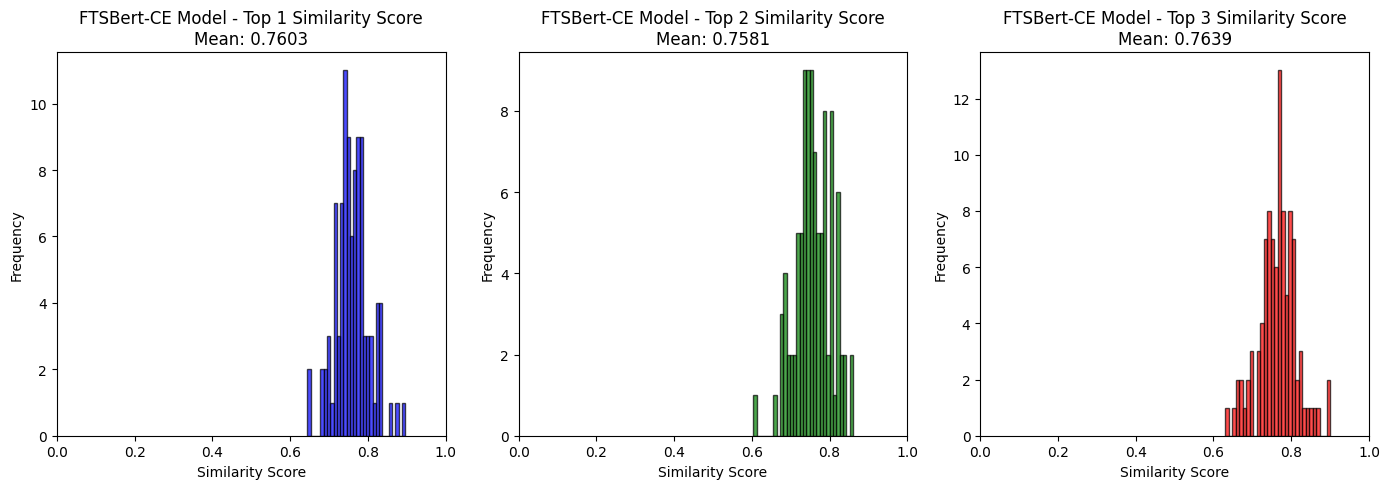

In [47]:
# visualizing the similarity scores of the FTSBert-CE model
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# A helper function for smart plotting
def smart_hist(ax, data, color, title):
    unique_vals = np.unique(data)
    
    if len(unique_vals) == 1:
        # All values are identical → plot a visible bar
        val = unique_vals[0]
        count = len(data)
        ax.bar([val], [count], width=0.01, color=color, edgecolor='black')
        ax.set_xlim(val - 0.05, val + 0.05)  # zoom in around the bar
        ax.set_title(title)
        ax.set_xlabel('Similarity Score')
        ax.set_ylabel('Frequency')
    else:
        # Normal histogram
        ax.hist(data, bins=30, alpha=0.7, color=color, edgecolor='black')
        ax.set_xlim(0, 1)
        ax.set_title(title)
        ax.set_xlabel('Similarity Score')
        ax.set_ylabel('Frequency')


# Top 1
ce_top1_sims = cross_df['top1_similarity']
smart_hist(
    axes[0],
    ce_top1_sims,
    color='blue',
    title=f'FTSBert-CE Model - Top 1 Similarity Score\nMean: {ce_top1_sims.mean():.4f}'
)

# Top 2
ce_top2_sims = cross_df['top2_similarity']
smart_hist(
    axes[1],
    ce_top2_sims,
    color='green',
    title=f'FTSBert-CE Model - Top 2 Similarity Score\nMean: {ce_top2_sims.mean():.4f}'
)

# Top 3
ce_top3_sims = cross_df['top3_similarity']
smart_hist(
    axes[2],
    ce_top3_sims,
    color='red',
    title=f'FTSBert-CE Model - Top 3 Similarity Score\nMean: {ce_top3_sims.mean():.4f}'
)

plt.tight_layout()
plt.show()


In [48]:
cross_df.to_csv("../4_model_outputs/crossencoder_outputs.csv")